# 1. Data reading & first glance

**Challenge overview**

You were tasked with creating a model that predicts the price of a house based on its characteristics. 

The project will be divided into two major phases:
* Create a model to predict whether a house is expensive or not. 
* Create a model to predict the exact price of a house.

**Dataset variables**

* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* TotalBsmtSF: Total square feet of basement area
* BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
* Fireplaces: Number of fireplaces
* PoolArea: Pool area in square feet
* GarageCars: Size of garage in car capacity
* WoodDeckSF: Wood deck area in square feet
* ScreenPorch: Screen porch area in square feet

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv("housing-classification-iter-0-2.csv") #reading data from csv

In [47]:
df

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
0,8450,65.0,856,3,0,0,2,0,0,0
1,9600,80.0,1262,3,1,0,2,298,0,0
2,11250,68.0,920,3,1,0,2,0,0,0
3,9550,60.0,756,3,1,0,3,0,0,0
4,14260,84.0,1145,4,1,0,3,192,0,0
...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,0
1456,13175,85.0,1542,3,2,0,2,349,0,0
1457,9042,66.0,1152,4,2,0,1,0,0,1
1458,9717,68.0,1078,2,0,0,1,366,0,0


In [48]:
df_expensive = df.loc[df['Expensive']== 1]

In [49]:
df_expensive.shape

(217, 10)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
 9   Expensive     1460 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 114.2 KB


The target column (what we want our model to predict) is usually denoted as y. We will "pop" it out from the rest of the data:

In [51]:
y = df.pop("Expensive")

As you can see, the target is just a bunch of zeros and ones. 1 means the expensive and 0 not expensive

In [52]:
print(y.tolist())

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 




The "feature vector" (the columns used to predict the target) is denoted as `X` (original dataset)


In [53]:
X = df
X.shape

(1460, 9)

## 2. Basic Exploration

Just look briefly at the data types of your columns get get an idea of how they look like.

In [54]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   TotalBsmtSF   1460 non-null   int64  
 3   BedroomAbvGr  1460 non-null   int64  
 4   Fireplaces    1460 non-null   int64  
 5   PoolArea      1460 non-null   int64  
 6   GarageCars    1460 non-null   int64  
 7   WoodDeckSF    1460 non-null   int64  
 8   ScreenPorch   1460 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 102.8 KB


In [55]:
X.isna().sum()

LotArea           0
LotFrontage     259
TotalBsmtSF       0
BedroomAbvGr      0
Fireplaces        0
PoolArea          0
GarageCars        0
WoodDeckSF        0
ScreenPorch       0
dtype: int64

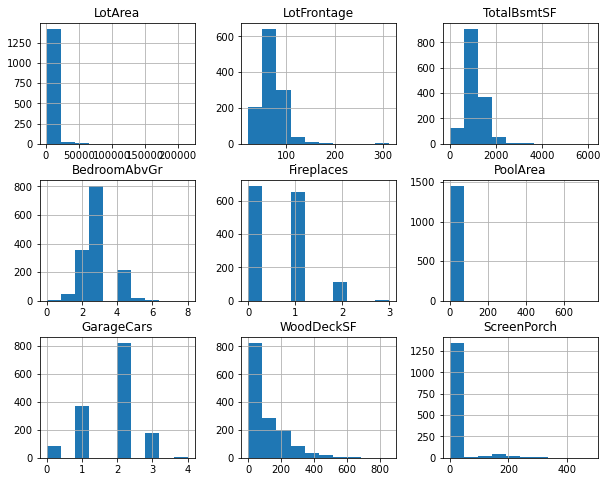

In [56]:
X.hist(figsize=(10, 8));

## 3. Train-test split

Before performing a deeper exploration, we will split the dataset into 2 chunks: train and test. We will use the train set to find patterns in the data and create a model. The test set will remain untouched, unseen, unexplored. It will be the "reality check" for our model, it will let us know whether our model is able to generalize. 

Here, we're using the function `train_test_split` to shuffle the observations randomly and create the train and test sets for both the `X` and the `y` objects at the same time, ensuring that they are shuffled the same way:

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31416)

In [58]:
X_train.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
772,7819,94.0,1029,3,1,0,2,144,0
157,12003,92.0,774,4,1,0,3,0,0
360,7540,NaN,888,2,1,0,2,0,192
744,5395,41.0,1337,2,1,0,2,96,0
150,10356,120.0,969,3,0,0,2,0,0


In [59]:
y_train.head()

772    0
157    1
360    0
744    0
150    0
Name: Expensive, dtype: int64

As you can see from the indeces, both the `X` and `y` train sets contain first the passenger in position `772`, then the one in position `157`, etc.

The same applies for the test set:

In [60]:
X_test.head()

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch
1253,17542,NaN,1192,3,2,0,2,220,0
202,7000,50.0,617,2,0,0,1,0,0
213,13568,43.0,990,3,0,0,2,224,0
1331,10780,55.0,911,3,0,0,2,0,0
120,21453,NaN,938,1,2,0,2,0,0


In [61]:
y_test

1253    1
202     0
213     0
1331    0
120     0
       ..
978     0
1057    0
782     0
125     0
1409    0
Name: Expensive, Length: 292, dtype: int64

## 4. Iteration 0 - An intuition-based model

Machine Learning models should never be the first option to solve any problem. Machine Learning adds complexity to a business, and it should only be implemented if it represents a clear advantage compared to a simple working solution that the company has build following simple rules, common sense or gained expertise. 

Therefore, the first step when solving any problem should be to create a simple (even dumb) working solution and learn to evaluate it. In our example: how well can we predict expensive with an extremely simple rule?

Let's start by suggesting that expensive one . We will call this "model" the "pessimistic" one, and use it to make predictions for both the train and the test set:

In [62]:
y_train.value_counts()

0    989
1    179
Name: Expensive, dtype: int64

In [63]:
len(y_train)

1168

Our predictions for the train set will be just 1168 zeros:

---



In [64]:
pred_pessimistic_train = pd.Series(0, index=range(1168))

Now: how good are those predictions? We will compare them with the true values and find out the percentage of correctly predicted passengers. This metric is called **accuracy**:

In [65]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_true = y_train,
                                 y_pred = pred_pessimistic_train
                                 )

round(train_accuracy, 2)

0.85

Okay, we have about a 85% accuracy in our train set. Let's find out how would 

---

have it done in our test set:

In [66]:
len(y_test)

292

In [67]:
pred_pessimistic_test = pd.Series(0, index=range(292))

In [68]:
test_accuracy = accuracy_score(y_true = y_test,
                               y_pred = pred_pessimistic_test
                               )

round(test_accuracy, 2)

0.87

The performance is pretty much the same (difference is 0.02). This is typical from simple models: they have a low performance, but the performance stays the same in the data where they were trained and in new data.

A model with a consistent performance between the training and testing set is said to have a **low variance**, which is good. However, a model with a low performance is said to have a **high bias**, which is not so good.

Our model, with high bias, is missing important connections between the features and the target. Another term to describe this is **underfitting**.


Ideally, we want a low variance and a low bias: a high accuracy consistent across the train and the test set.

## 5. Implement a Decision Tree

A Decision Tree is one of the simplest Machine Learning models. To implement it, we need to first:

- Import it from the appropriate submodule of Scikit-Learn.
- Initialize it.
- Fit it.

#### The model cannot deal with missing data. Let's fix it.

## 6. Dealing with missing data

1.   List item
2.   List item



#### 6.1. We will use the `SimpleImputer()` with its default values. It will replace any missing value with the mean of the column it belongs to.

In [69]:
# import
from sklearn.impute import SimpleImputer

# initialize
my_imputer = SimpleImputer()

# fit
my_imputer.fit(X_train)

# transform train 
X_imputed_train = my_imputer.transform(X_train)

#### 6.2. Implement a Decision Tree ( missing values imputed)

In [70]:
# 1. import the model
from sklearn.tree import DecisionTreeClassifier

# 2. initialize the model (optional: give some parameters)
my_tree = DecisionTreeClassifier()

# 3. fit the model to the train data
my_tree.fit(X = X_imputed_train, 
            y = y_train)

DecisionTreeClassifier()

#### 6.3. Make predictions and check accuracy on the train set

In [71]:
# make predictions
y_prediction_tree_train = my_tree.predict(X_imputed_train)

In [72]:
# Check accuracy on the train set
from sklearn.metrics import accuracy_score

accuracy_score(y_true = y_train,
               y_pred = y_prediction_tree_train
              )

1.0

The model seems to work REALLY well. Suspiciously well, even. Remember that the model has been trained using the train set and we have now checked its accuracy on the very same train set. The real evaluation will come from the test set.

## 7. Check accuracy for the test set

Is the model able to generalize? Is it able to make predictions on data it has not "seen" before?

#### 7.1. Transform the test set

The test set already contains only numerical features, but we still need to impute the missing values with the "imputer" we already created and fitted on the train set.

Remember: transformers only have to be fitted to the train set. Then, they are used to transform both the train and the test set.

In [73]:
# impute NaN's to test set
X_imputed_test = my_imputer.transform(X_test)

#### 7.2. Make predictions on the test set

---



In [74]:
y_prediction_tree_test = my_tree.predict(X_imputed_test)

In [75]:
accuracy_score(y_true = y_test,
               y_pred = y_prediction_tree_test
              )

0.8767123287671232

Our model has a **very high variance**: the difference between train and test set is huge. We can also say that our model suffers from **overfitting**: it has captured patterns in the training set that were not present in the testing set (they were mere "noise").

We will need to improve the model.

## 8. Plotting the Decision Tree

A Decision Tree is a succession of rules that split the dataset based on the variables that better predict the target. This tree, with its rules, can be visualized in a diagram:

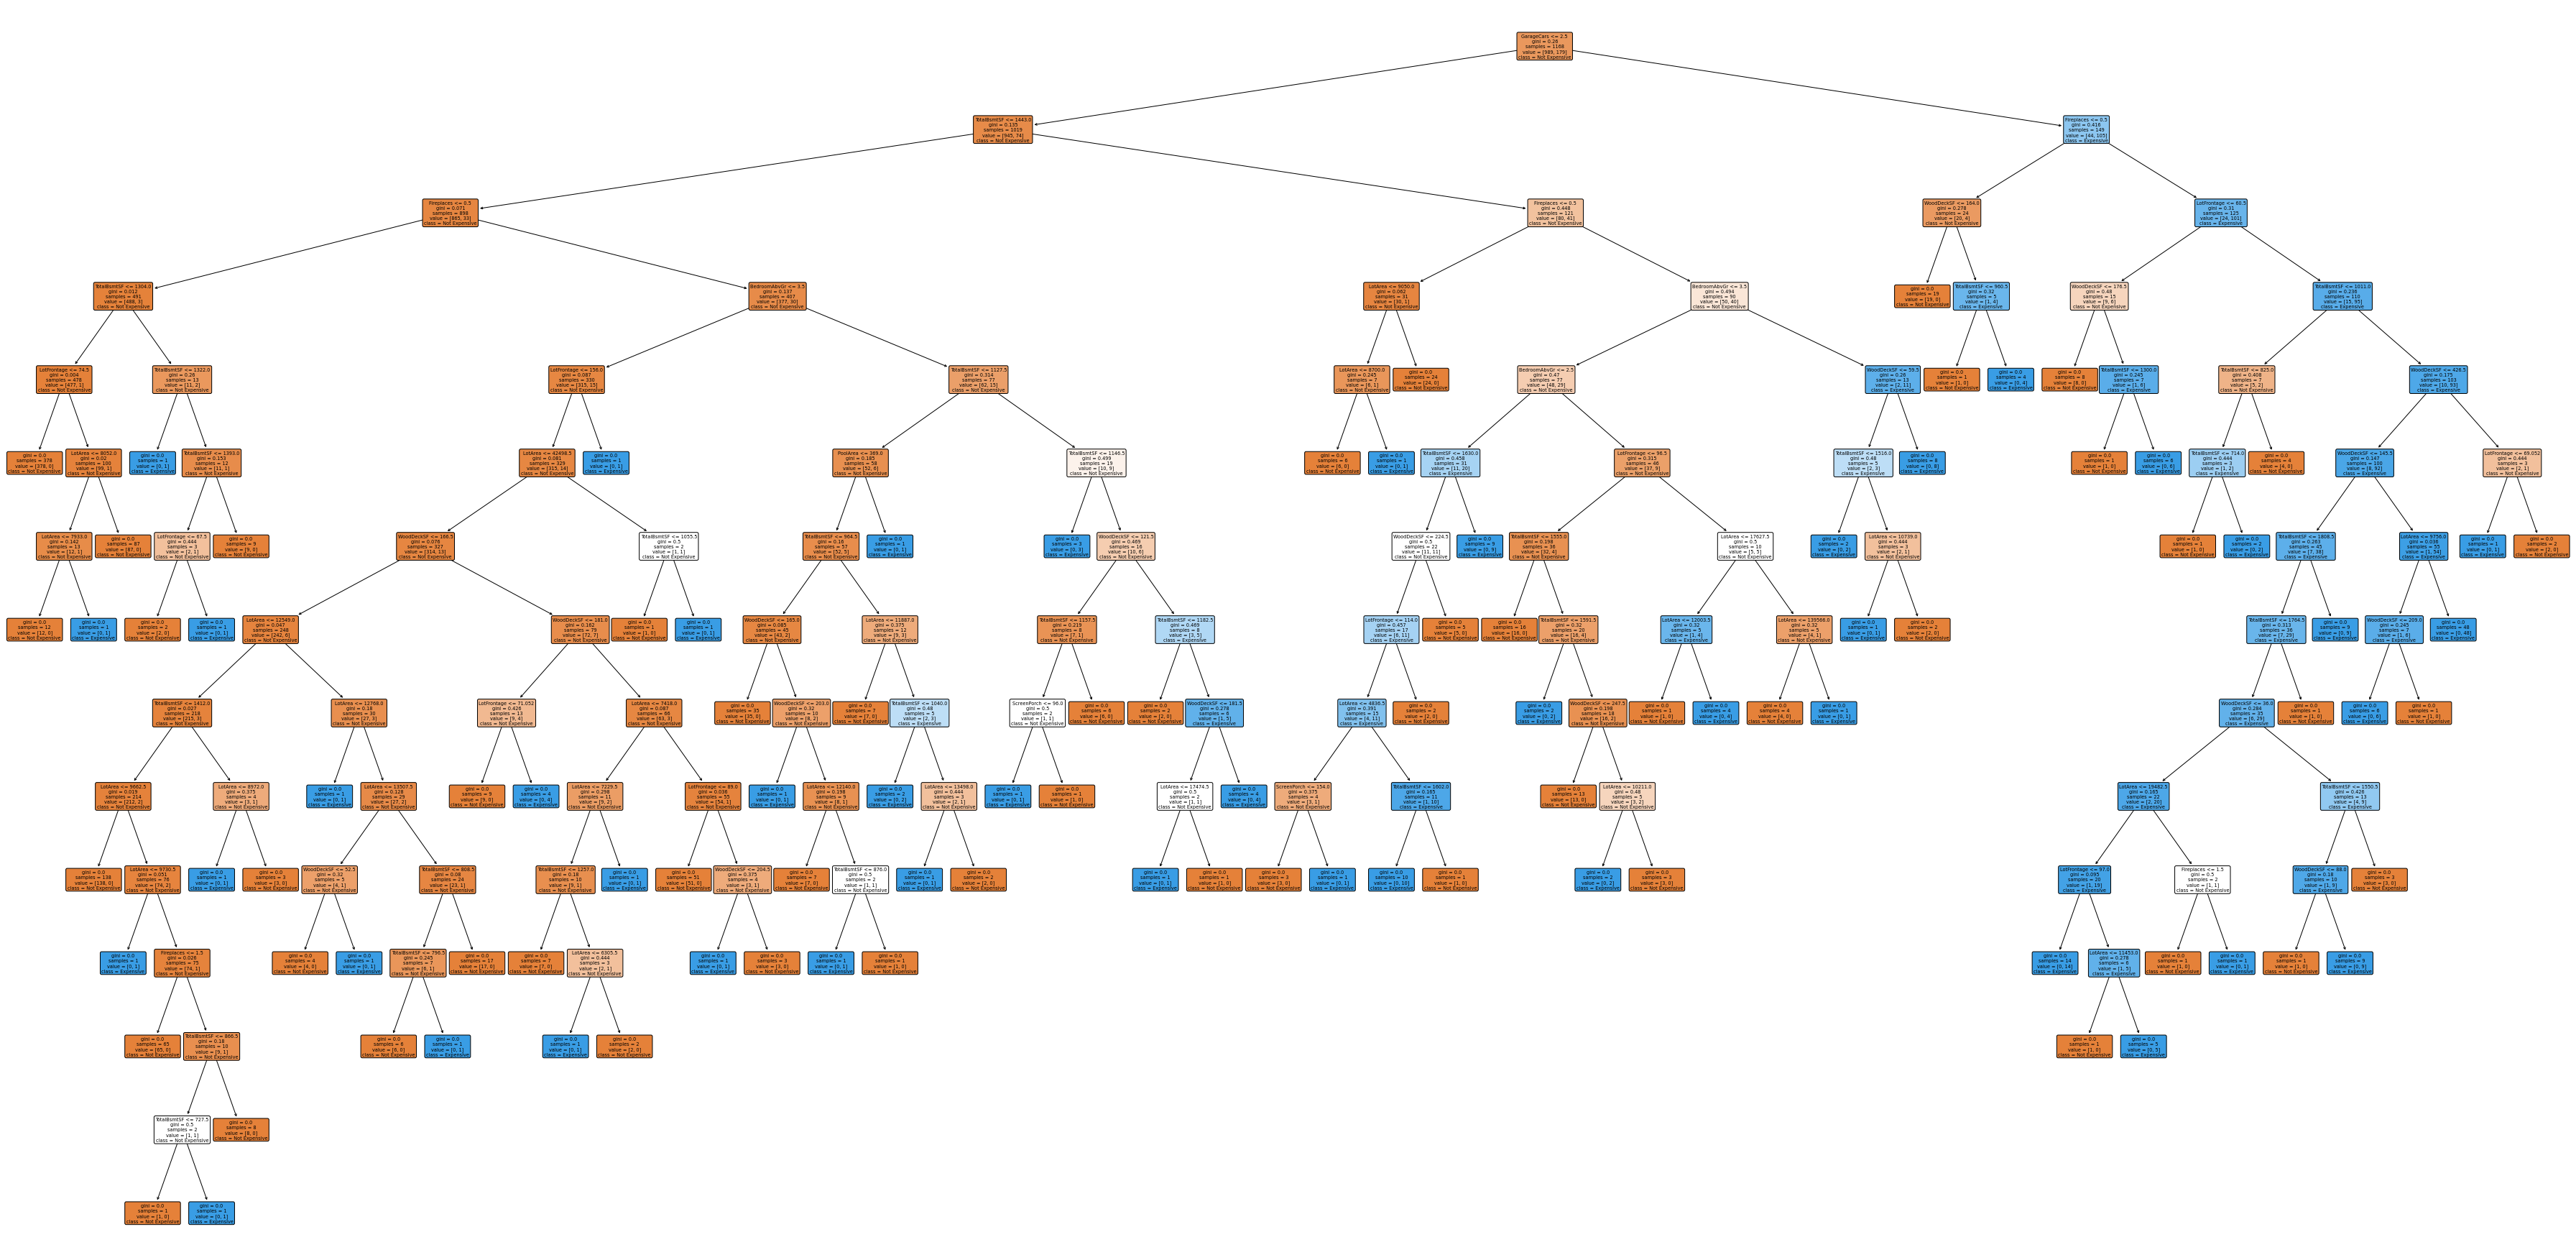

In [76]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
     my_tree,
     filled=True, 
     rounded=True, 
     class_names=['Not Expensive','Expensive'], 
     feature_names=X.columns
     );

Our current tree is too big to distinguish what's going on. It has dozens, maybe hundreds of rules. In other words, our model is **very complex**, which is a common characteristic of models that suffer from overfitting.

To reduce the complexity (the size) of the tree and prevent overfitting, we can play with the hyperparameters of the tree. It's a process known as "pruning" the tree.

### Pruning the tree

1. Tweak the parameters `max_depth` and `min_samples_leaf` of the decision tree, based on the Scikit-Learn documentation.
2. Try to make the tree smaller.
3. Visualize again the tree.
4. Check the performance of your "small tree" on the train & test sets.

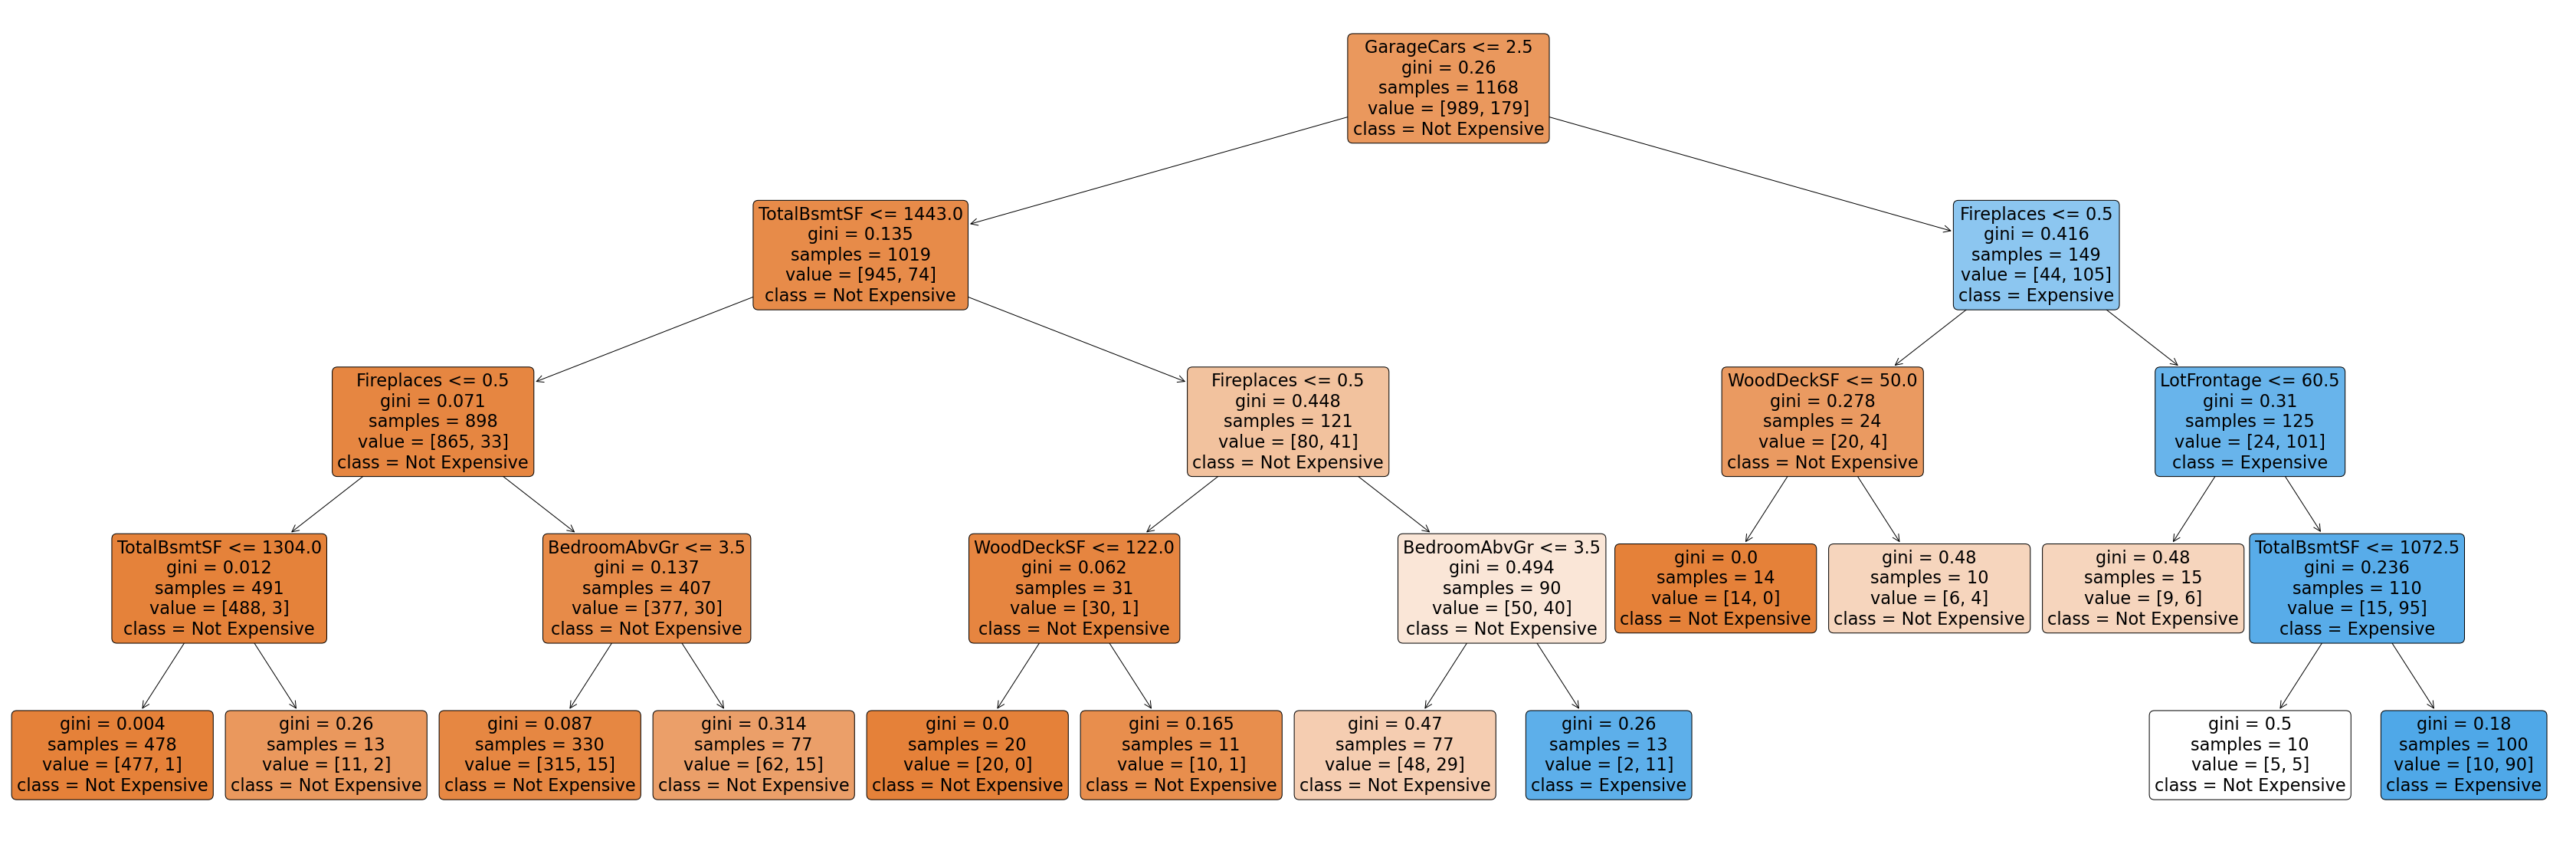

In [80]:
my_tree = DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

# 3. fit the model to the train data
my_tree.fit(X = X_imputed_train, 
            y = y_train)

plt.figure(figsize=(40, 20))
plot_tree(
    my_tree,
    filled=True, 
    rounded=True, 
    class_names=['Not Expensive','Expensive'], 
    feature_names=X.columns
    );

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(my_tree, X_imputed_test , y_test, display_labels=['Not Expensive','Expensive'])
#plot_confusion_matrix(my_tree, y_test, y_prediction_tree_test,display_labels=['Not Expensive','Expensive'])